# install conda, rdkit, pycaret

In [ ]:
! pip install pycaret
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
! conda install -c rdkit rdkit -y


     |████████████████████████████████| 288 kB 3.8 MB/s 
     |████████████████████████████████| 6.8 MB 48.4 MB/s 
     |████████████████████████████████| 113 kB 47.3 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 15.5 MB 59.2 MB/s 
     |████████████████████████████████| 167 kB 54.4 MB/s 
     |████████████████████████████████| 1.3 MB 65.4 MB/s 
     |████████████████████████████████| 1.7 MB 65.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 59.1 MB/s 
     |████████████████████████████████| 261 kB 64.8 MB/s 
     |████████████████████████████████| 62 kB 728 kB/s 
     |████████████████████████████████| 675 kB 57.5 MB/s 
     |████████████████████████████████| 303 kB 42.5 MB/s 
     |███████████████████

# import modules and packages

In [32]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from rdkit.Chem import DataStructs

# read and process data

In [108]:
file = pd.read_csv('molnet_bace.csv')
dataset = file[['mol', 'Class']]
train_data_x, test_data_x, train_y, test_y = train_test_split(dataset['mol'], dataset['Class'], test_size = 0.2, random_state = 1 )


In [109]:
def mol2fp(mol, radi=4, nBits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radi, nBits=nBits)
    arr = np.zeros((0,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr


In [110]:
nBits=2048
columns = [f'fp_{idx}' for idx in range(nBits)] + ['classification']

train_mols = [Chem.MolFromSmiles(smi) for smi in train_data_x]
train_x = np.array([mol2fp(mol, nBits=nBits) for mol in train_mols])
train_target = np.array(train_y).reshape(-1,1)
train_data = np.concatenate([train_x, train_target], axis=1)
train_df = pd.DataFrame(train_data, columns=columns)

test_mols = [Chem.MolFromSmiles(smi) for smi in test_data_x]
test_x = np.array([mol2fp(mol, nBits=nBits) for mol in test_mols])
test_target = np.array(test_y).reshape(-1,1)
test_data = np.concatenate([test_x, test_target], axis=1)
test_df = pd.DataFrame(test_data, columns=columns)

# select best models

In [111]:
classification_models = setup(data=train_df, target='classification', session_id=123)
best_models = compare_models(fold=5, n_select = 2, round = 2, sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.79,0.87,0.77,0.77,0.77,0.57,0.58,1.69
rf,Random Forest Classifier,0.80,0.87,0.79,0.78,0.78,0.59,0.59,0.85
gbc,Gradient Boosting Classifier,0.79,0.87,0.77,0.78,0.78,0.58,0.58,2.07
et,Extra Trees Classifier,0.79,0.87,0.77,0.78,0.78,0.59,0.59,0.88
lightgbm,Light Gradient Boosting Machine,0.78,0.86,0.75,0.78,0.76,0.56,0.56,0.43
knn,K Neighbors Classifier,0.78,0.85,0.79,0.76,0.77,0.56,0.57,0.89
ada,Ada Boost Classifier,0.76,0.81,0.73,0.74,0.73,0.51,0.51,0.63
dt,Decision Tree Classifier,0.74,0.74,0.74,0.71,0.72,0.48,0.48,0.18
lda,Linear Discriminant Analysis,0.74,0.74,0.73,0.72,0.72,0.48,0.48,0.76
nb,Naive Bayes,0.68,0.68,0.74,0.63,0.68,0.36,0.37,0.10


In [112]:
compare_models_results = get_config('display_container')[-1]
compare_models_results_sub = compare_models_results.iloc[:, [0, 1, 2, 3, 4, 5]]
compare_models_results_sub

,Model,Accuracy,AUC,Recall,Prec.,F1
lr,Logistic Regression,0.79,0.87,0.77,0.77,0.77
rf,Random Forest Classifier,0.80,0.87,0.79,0.78,0.78
gbc,Gradient Boosting Classifier,0.79,0.87,0.77,0.78,0.78
et,Extra Trees Classifier,0.79,0.87,0.77,0.78,0.78
lightgbm,Light Gradient Boosting Machine,0.78,0.86,0.75,0.78,0.76
knn,K Neighbors Classifier,0.78,0.85,0.79,0.76,0.77
ada,Ada Boost Classifier,0.76,0.81,0.73,0.74,0.73
dt,Decision Tree Classifier,0.74,0.74,0.74,0.71,0.72
lda,Linear Discriminant Analysis,0.74,0.74,0.73,0.72,0.72
nb,Naive Bayes,0.68,0.68,0.74,0.63,0.68


# Train the first model

In [113]:
# helper function to get a nice model name
def get_model_name(e) :
    mn = str(e).split("(")[0]

    if 'catboost' in str(e):
        mn = 'CatBoostClassifier'
    
    model_dict_logging = {'LogisticRegression' : 'lr',
                        'RandomForestClassifier' : 'rf', 
                        'GradientBoostingClassifier' : 'gbc',
                        'ExtraTreesClassifier' : 'et',
                        'LGBMClassifier' : 'lightgbm',
                        'KNeighborsClassifier' : 'knn', 
                        'AdaBoostClassifier' : 'ada', 
                        'DecisionTreeClassifier' : 'dt',
                        'LinearDiscriminantAnalysis' : 'lda',
                        'GaussianNB' : 'nb',
                        'QuadraticDiscriminantAnalysis' : 'qda',
                        'DummyClassifier' : 'dummy',
                        'SGDClassifier' : 'svm',
                        'RidgeClassifier' : 'ridge'} 

    return model_dict_logging.get(mn)




In [114]:
best_model_name_1 = get_model_name(best_models[0])
best_model_1 = create_model(best_model_name_1, round = 2)
best_model_1_cv_results = get_config('display_container')[-1]
best_model_1_cv_results_sub = best_model_1_cv_results.iloc[:, [0, 1, 2, 3, 4]]
best_model_1_cv_results_sub

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.81,0.89,0.77,0.81,0.79,0.62,0.62
1,0.79,0.86,0.79,0.76,0.77,0.58,0.58
2,0.81,0.89,0.72,0.85,0.78,0.62,0.62
3,0.81,0.90,0.80,0.80,0.80,0.62,0.62
4,0.81,0.91,0.85,0.77,0.81,0.62,0.63
5,0.76,0.85,0.75,0.75,0.75,0.53,0.53
6,0.82,0.89,0.82,0.80,0.81,0.64,0.64
7,0.81,0.86,0.82,0.78,0.80,0.62,0.62
8,0.81,0.86,0.82,0.78,0.80,0.62,0.62
9,0.77,0.84,0.79,0.74,0.77,0.55,0.55


,Accuracy,AUC,Recall,Prec.,F1
0,0.81,0.89,0.77,0.81,0.79
1,0.79,0.86,0.79,0.76,0.77
2,0.81,0.89,0.72,0.85,0.78
3,0.81,0.90,0.80,0.80,0.80
4,0.81,0.91,0.85,0.77,0.81
5,0.76,0.85,0.75,0.75,0.75
6,0.82,0.89,0.82,0.80,0.81
7,0.81,0.86,0.82,0.78,0.80
8,0.81,0.86,0.82,0.78,0.80
9,0.77,0.84,0.79,0.74,0.77


In [115]:
tuned_model_1 = tune_model(best_model_1, round = 2)
tuned_model_1_cv_results = get_config('display_container')[-1]
tuned_model_1_cv_results_sub = tuned_model_1_cv_results.iloc[:, [0, 1, 2, 3, 4]]
tuned_model_1_cv_results_sub

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.84,0.89,0.82,0.82,0.82,0.67,0.67
1,0.76,0.86,0.79,0.72,0.76,0.53,0.53
2,0.81,0.89,0.72,0.85,0.78,0.62,0.62
3,0.84,0.90,0.85,0.81,0.83,0.67,0.67
4,0.80,0.91,0.82,0.77,0.80,0.60,0.60
5,0.75,0.86,0.75,0.73,0.74,0.50,0.50
6,0.82,0.89,0.82,0.80,0.81,0.64,0.64
7,0.83,0.87,0.82,0.82,0.82,0.66,0.66
8,0.81,0.86,0.82,0.78,0.80,0.62,0.62
9,0.81,0.84,0.79,0.79,0.79,0.62,0.62


,Accuracy,AUC,Recall,Prec.,F1
0,0.84,0.89,0.82,0.82,0.82
1,0.76,0.86,0.79,0.72,0.76
2,0.81,0.89,0.72,0.85,0.78
3,0.84,0.90,0.85,0.81,0.83
4,0.80,0.91,0.82,0.77,0.80
5,0.75,0.86,0.75,0.73,0.74
6,0.82,0.89,0.82,0.80,0.81
7,0.83,0.87,0.82,0.82,0.82
8,0.81,0.86,0.82,0.78,0.80
9,0.81,0.84,0.79,0.79,0.79


In [172]:
tuned_model_1_cv_mean_results = tuned_model_1_cv_results_sub.loc['Mean',:]
tuned_model_1_cv_mean_results.name = 'test_cv'
tuned_model_1_cv_mean_results

Accuracy    0.81
AUC         0.88
Recall      0.80
Prec.       0.79
F1          0.79
Name: test_cv, dtype: float64

# plots

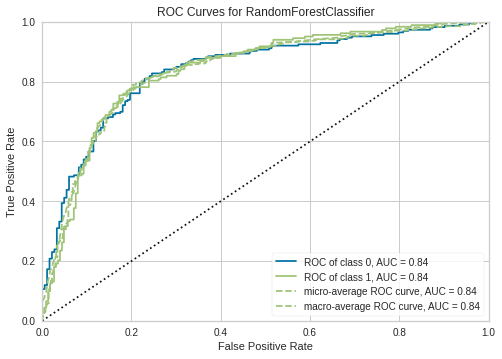

In [89]:
plot_model(tuned_model_1, plot = 'auc')

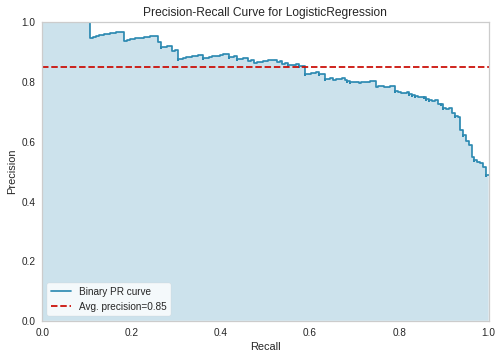

In [116]:
plot_model(tuned_model_1, plot = 'pr')

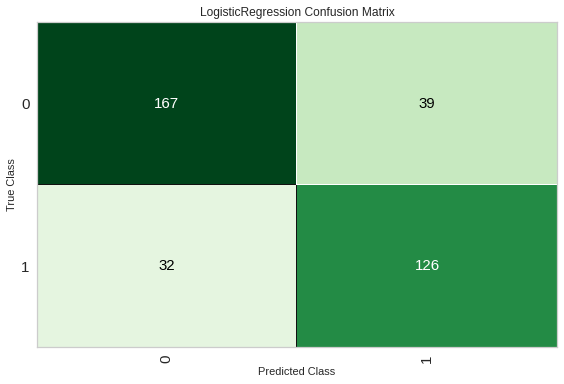

In [117]:
plot_model(tuned_model_1, plot = 'confusion_matrix')

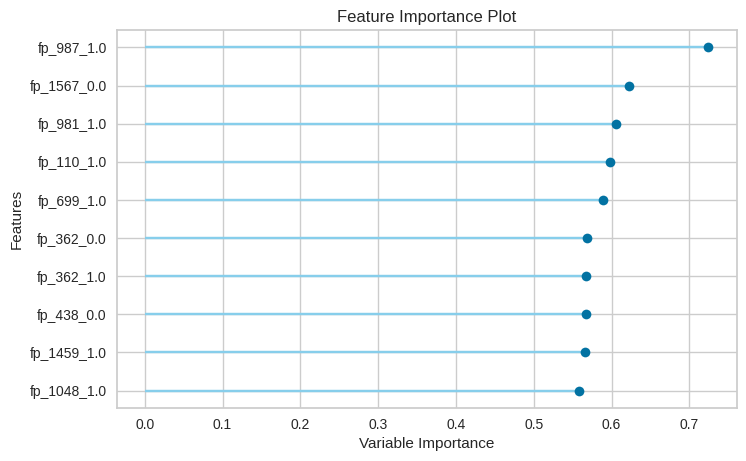

In [118]:
plot_model(tuned_model_1, plot = 'feature')

# Evaluate model

In [119]:
evaluate_model(tuned_model_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [147]:
predict_model_result = predict_model(tuned_model_1, round=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8,0.88,0.8,0.76,0.78,0.61,0.61


In [121]:
final_model_1 = finalize_model(tuned_model_1)
final_model_1

LogisticRegression(C=0.472, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
predict_model(final_model_1, round=2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.98,1.0,1.0,0.95,0.97,0.95,0.95


,fp_1473,fp_1874,fp_0_0.0,fp_1_0.0,fp_2_0.0,fp_3_1.0,fp_4_0.0,fp_5_0.0,fp_6_1.0,fp_7_1.0,fp_8_1.0,fp_9_0.0,fp_10_1.0,fp_11_1.0,fp_12_0.0,fp_13_1.0,fp_14_1.0,fp_15_1.0,fp_17_0.0,fp_18_1.0,fp_19_1.0,fp_20_0.0,fp_21_0.0,fp_22_1.0,fp_23_0.0,fp_24_1.0,fp_25_0.0,fp_26_1.0,fp_27_0.0,fp_27_1.0,fp_28_0.0,fp_29_1.0,fp_30_1.0,fp_31_1.0,fp_32_0.0,fp_33_1.0,fp_34_0.0,fp_34_1.0,fp_35_1.0,fp_36_0.0,...,fp_2009_0.0,fp_2010_0.0,fp_2011_0.0,fp_2012_1.0,fp_2013_1.0,fp_2014_1.0,fp_2015_1.0,fp_2016_1.0,fp_2018_0.0,fp_2019_0.0,fp_2020_0.0,fp_2021_0.0,fp_2022_0.0,fp_2023_1.0,fp_2024_0.0,fp_2025_1.0,fp_2026_1.0,fp_2027_1.0,fp_2028_1.0,fp_2029_1.0,fp_2031_1.0,fp_2032_1.0,fp_2033_1.0,fp_2034_0.0,fp_2035_1.0,fp_2036_1.0,fp_2037_1.0,fp_2038_0.0,fp_2039_1.0,fp_2040_0.0,fp_2041_1.0,fp_2042_1.0,fp_2043_1.0,fp_2044_1.0,fp_2045_1.0,fp_2046_1.0,fp_2047_1.0,classification,Label,Score
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.99
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.97
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.92
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98
360,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.88
361,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.98
362,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,

# predict undsee data

In [125]:
unseen_predictions = predict_model(final_model_1, data=test_df)
unseen_predictions.head()

,fp_0,fp_1,fp_2,fp_3,fp_4,fp_5,fp_6,fp_7,fp_8,fp_9,fp_10,fp_11,fp_12,fp_13,fp_14,fp_15,fp_16,fp_17,fp_18,fp_19,fp_20,fp_21,fp_22,fp_23,fp_24,fp_25,fp_26,fp_27,fp_28,fp_29,fp_30,fp_31,fp_32,fp_33,fp_34,fp_35,fp_36,fp_37,fp_38,fp_39,...,fp_2011,fp_2012,fp_2013,fp_2014,fp_2015,fp_2016,fp_2017,fp_2018,fp_2019,fp_2020,fp_2021,fp_2022,fp_2023,fp_2024,fp_2025,fp_2026,fp_2027,fp_2028,fp_2029,fp_2030,fp_2031,fp_2032,fp_2033,fp_2034,fp_2035,fp_2036,fp_2037,fp_2038,fp_2039,fp_2040,fp_2041,fp_2042,fp_2043,fp_2044,fp_2045,fp_2046,fp_2047,classification,Label,Score
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.7929
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.9613
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9838
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.9845
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9246


In [173]:
from pycaret.utils import check_metric

recall = check_metric(unseen_predictions.classification, pd.to_numeric(unseen_predictions['Label']), 'Recall')
auc = check_metric(unseen_predictions.classification, pd.to_numeric(unseen_predictions['Label']), 'AUC')
precision = check_metric(unseen_predictions.classification, pd.to_numeric(unseen_predictions['Label']), 'Precision')
f1 = check_metric(unseen_predictions.classification, pd.to_numeric(unseen_predictions['Label']), 'F1')
accuracy = check_metric(unseen_predictions.classification, pd.to_numeric(unseen_predictions['Label']), 'Accuracy')

test_results_series = pd.Series([accuracy, auc, recall, precision, f1], index=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'], name = 'test_ext').round(2)
test_results_series

Accuracy    0.81
AUC         0.81
Recall      0.82
Prec.       0.78
F1          0.80
Name: test_ext, dtype: float64

In [174]:
final_eval_results = pd.concat([tuned_model_1_cv_mean_results, test_results_series], axis=1).T
final_eval_results

,Accuracy,AUC,Recall,Prec.,F1
test_cv,0.81,0.88,0.80,0.79,0.79
test_ext,0.81,0.81,0.82,0.78,0.80


# save model and use model for future prediction

In [ ]:
# save model
save_model(final_rf, 'datasets/Final RF Model 19Nov2020')
# load model
saved_final_rf = load_model('datasets/Final RF Model 19Nov2020')
# predict
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [ ]:
# end